# Fuzzy Inference Systems

## A. Fuzzy inference systems

A fuzzy system is a repository of fuzzy expert knowledge that can reason data in vague terms instead of precise Boolean logic. The basic configuration of a fuzzy system is shown as:

![](figures/1*ArAJV83q01pz2thVR9yHNw.jpeg)

A typical fuzzy system can be split into four main parts, namely **fuzzifier**, **knowledge base**, **inference engine** and **defuzzifier**.

1. The **fuzzifier** maps a real crisp input to a fuzzy function, therefore determining the ‘degree of membership’ of the input to a vague concept. In a number of controllers, the values of the input variables are mapped to the range of values of the corresponding universe of discourse. The range and resolution of input-fuzzy sets and their effect on the fuzzification process are considered as factors affecting the overall performance of the controller.

2. The **knowledge base** comprises the knowledge of the application domain and the attendant control goals. It can be split into a database of **definitions** used to express linguistic control rules in the controller, and a **rule base** that describes the knowledge held by the experts of the domain. Intuitively, the knowledge base is the core element of a fuzzy controller as it will contain all the information necessary to accomplish its execution tasks. Various researchers have applied techniques to fine-tune a fuzzy controller’s knowledge base, such as Genetic Algorithms, or neural networks

3. The **Inference Engine** provides the decision-making logic of the controller. It deduces the fuzzy control actions by employing fuzzy implications and fuzzy rules of inference. In many aspects, it can be viewed as an emulation of human decision-making.

4. The **Defuzzification** process converts fuzzy control values into crisp quantities, that is, it links a single point to a fuzzy set, given that the point belongs to the support of the fuzzy set.

The expert knowledge is a collection of fuzzy membership functions and a set of fuzzy rules, known as the rule-base, having the form:

> **IF** `{antecedent clauses}` **THEN** `{consequent clauses}`

Thus, a rule will contain several clauses of antecedent type and some clauses of consequent type. Clauses will be of the form:

> `{variable name}` **is** `{set name}`

For example, we have two clauses, `Tempurature is Low` and `Speed is Slow`. A rule can be constructed based given clauses as below:

> **IF** `Tempurature is Low` **THEN** `Speed is Slow`

### 1. Mamdani Inference Fuzzy Systems

In **Mamdani's inferencing**, the antecedents and consequents of a fuzzy rule are fuzzy sets. The inference is based on **Generalised Modus Ponens**, which states that the degree of truth of the consequent of a fuzzy rule is the degree of truth of the antecedent.

In the case where more than one antecedent clause is present, the individual degrees of membership are joined using a min t-norm operator. If the fuzzy system contains several rules, their output is combined using a max s-norm operator. **Defuzzification** is necessary so that the consequent action can be expressed in terms of a crisp value.

The graphical representation of this process is shown below:

![](figures/1*etBn5hRH1gGvzBEI24x1hA.jpeg)

### 2. Takagi-Sugeno inference system

In **Takagi-Sugeno inferencing**, the consequents are functions that map crisp input values to the rule’s crisp output. Hence, fuzzy rules are of the form:

> **IF** `x IS X` **and** `y IS Y` **THEN** `z=f(x,y)`

where f is generally a linear function in X and Y.

In contrast to Mamdani's fuzzy systems, the rules are not combined using a max -operator but are combined by finding a weighted average, where the weight of a given rule is the degree of membership of its antecedent. Therefore, Takagi-Sugeno systems do not require any defuzzification.

## B. Mamdani Fuzzy System Implementation

The design of Fuzzy Inference Systems is based on several considerations:
* A Fuzzy Inference System will require **input** and **output** variables and a collection of **fuzzy rules**.
* Both input and output variables will contain a collection of fuzzy sets if the Fuzzy Inference System is of **Mamdani type**.
* Input and output variables are very similar, but they are used differently by fuzzy rules. During execution, input variables use the input values to the system to fuzzify their sets, that is they determine the degree of belonging of that input value to all the fuzzy sets of the variable. Each rule contributes to some extent to the output variables; the totality of this contribution will determine the output of the system.

The Fuzzy System architecture is design into `FuzzySystem` class, which is formed from subclass components:
1. `FuzzySet` class: define a set of elements have degrees of membership.
2. `FuzzyVariable` class: define the language that will be used to discuss a fuzzy concept, e.g. temperature, pressure, etc. variables can be of **input** and **output** in type.
    2.a. `FuzzyVariableInput` class: having `fuzzify` method to fuzzify the variable
    2.b. `FuzzyVariableOutput` class.
3. `FuzzyClause` class: define the clauses for fuzzy rules from fuzzy variable and fuzzy set.
4. `FuzzyRule` class: define the fuzzy rules.

## C. Implementation Exercise

The exercise requires you to complete the methods that having **TODO** requirement in `FuzzySystem`, `FuzzyRule`, `FuzzyVariable` classes in the corresponding `*.py` files in `fuzzy_system` folder.

After completing the implementation requirement, try the implement the example below

In [1]:
from fuzzy_system import FuzzyVariableInput, FuzzyVariableOutput, FuzzySystem


Bad key "text.kerning_factor" on line 4 in
/Users/huangpeijun/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


This example is constructed to control speed of fan according to the environment's temperature and humidity.

![](figures/1*NIUbpQp93_OFBKM_dYJQvg.jpeg)

The first step in the design of our system is to define fuzzy sets to describe the input and output variables. There are three fuzzy sets:

> Temperature: Cold, Medium, Hot
>
> Humidity: Dry, Normal, Wet
>
> Fan speed: Slow, Moderate, Fast

The diagram below shows a graphical representation of the input and output variables of our system and their respective sets.

![](figures/1*QgzU5OF0uGucga5d1nzdig.jpeg)

The first step in the design of our system is to define fuzzy sets to describe the input and output variables.

In [2]:
# Define the temperature variable with its fuzzy set
temp = FuzzyVariableInput('Temperature', 10, 40, 100)
temp.add_triangular('Cold', 10, 10, 25)
temp.add_triangular('Medium', 15, 25, 35)
temp.add_triangular('Hot', 25, 40, 40)

In [3]:
# TODO: Based on the above graphical representation, please define the Humidity variable and its fuzzy set as the input variable
# Write the code below
humidity = FuzzyVariableInput('Humidity', 20, 100, 100)
humidity.add_triangular('Dry', 20, 20, 60)
humidity.add_trapezoidal('Normal', 30, 60, 75, 90)
humidity.add_triangular('Wet', 60, 100, 100)

In [4]:
# TODO: Based on the above graphical representation, please define the Speed variable and its fuzzy set as the output variable
# Write the code below
motor_speed = FuzzyVariableOutput('Motor Speed', 0, 100, 100)
motor_speed.add_triangular('Slow', 0, 0, 50)
motor_speed.add_triangular('Moderate', 10, 50 ,90)
motor_speed.add_triangular('Fast', 50,100, 100)

Then we construct a fuzzy system, and add defined variables to it.

In [5]:
system = FuzzySystem()
system.add_input_variable(temp)
system.add_input_variable(humidity)
system.add_output_variable(motor_speed)

The next step is to define the rules. A total of nine rules are used to describe the knowledge necessary to operate our fan controller:

> IF Temperature is Cold and Humidity is Dry THEN Fan Speed is Slow
>
> IF Temperature is Medium and Humidity is Dry THEN Fan Speed is Slow
>
> IF Temperature is Cold and Humidity is Normal THEN Fan Speed is Slow
>
> IF Temperature is Hot and Humidity is Dry THEN Fan Speed is Moderate
>
> IF Temperature is Medium and Humidity is Normal THEN Fan Speed is Moderate
>
> IF Temperature is Cold and Humidity is Wet THEN Fan Speed is Moderate
>
> IF Temperature is Hot and Humidity is Normal THEN Fan Speed is Fast
>
> IF Temperature is Hot and Humidity is Wet THEN Fan Speed is Fast
>
> IF Temperature is Medium and Humidity is Wet THEN Fan Speed is Fast



In [6]:
system.add_rule(antecedent_clauses={temp:temp.get_set('Cold'),humidity:humidity.get_set('Dry')},
                consequent_clauses={motor_speed:motor_speed.get_set('Slow')})
# TODO: Write the remaining rules and add to the system
# Write your code below
system.add_rule(antecedent_clauses={temp:temp.get_set('Medium'),humidity:humidity.get_set('Dry')},
                consequent_clauses={motor_speed:motor_speed.get_set('Slow')})

system.add_rule(antecedent_clauses={temp:temp.get_set('Cold'),humidity:humidity.get_set('Normal')},
                consequent_clauses={motor_speed:motor_speed.get_set('Slow')})

system.add_rule(antecedent_clauses={temp:temp.get_set('Hot'),humidity:humidity.get_set('Dry')},
                consequent_clauses={motor_speed:motor_speed.get_set('Moderate')})

system.add_rule(antecedent_clauses={temp:temp.get_set('Medium'),humidity:humidity.get_set('Normal')},
                consequent_clauses={motor_speed:motor_speed.get_set('Moderate')})

system.add_rule(antecedent_clauses={temp:temp.get_set('Cold'),humidity:humidity.get_set('Wet')},
                consequent_clauses={motor_speed:motor_speed.get_set('Fast')})

system.add_rule(antecedent_clauses={temp:temp.get_set('Hot'),humidity:humidity.get_set('Normal')},
                consequent_clauses={motor_speed:motor_speed.get_set('Fast')})

system.add_rule(antecedent_clauses={temp:temp.get_set('Medium'),humidity:humidity.get_set('Wet')},
                consequent_clauses={motor_speed:motor_speed.get_set('Fast')})

Inference a example. The output should be 37.2465

In [7]:
output = system.evaluate_output(input_values={'Temperature':18, 'Humidity':60})
output

{'Motor Speed': 37.24647662394699}

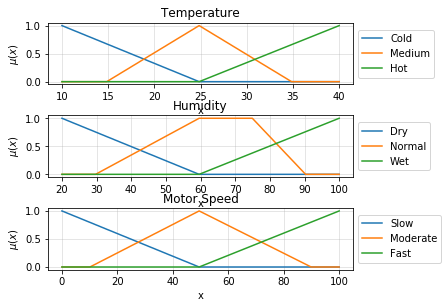

In [8]:
# print system
system.plot_system()